In [1]:
#Linear Algebra
import numpy as np
#Data preprocessing
import pandas as pd
#setting display options
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)
pd.set_option('max_colwidth', 300)
np.set_printoptions(linewidth =400)
#Matlab-style plotting
from matplotlib import pyplot as plt
%matplotlib inline
#Advance-style plotting
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')
#Ignore annoying warning from sklearn and seaborn
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
train = pd.read_excel(r'C:\Users\ABOFFICIAL\Desktop\Predicting-Food-Delivery-Time-master\Predicting-Food-Delivery-Time-master\processedtrain.xlsx', encoding='utf-8')
test =pd.read_excel(r'C:\Users\ABOFFICIAL\Desktop\Predicting-Food-Delivery-Time-master\Predicting-Food-Delivery-Time-master\processedtest.xlsx', encoding='utf-8')

In [3]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65


In [4]:
train['Rating'].value_counts()

-1.0    1962
 3.7     869
 3.6     846
 3.5     818
 3.8     800
 3.9     749
 3.4     718
 3.3     675
 4.0     614
 3.2     511
 4.1     459
 3.1     411
 3.0     302
 4.2     272
 4.3     247
 2.9     199
 2.8     157
 4.4     142
 4.5      78
 2.7      76
 2.6      42
 4.6      41
 4.7      36
 2.5      27
 4.8      13
 2.4      13
 4.9       8
 2.3       6
 2.1       1
 2.2       1
Name: Rating, dtype: int64

In [5]:
test['Rating'].value_counts()

-1.0    507
 3.6    223
 3.9    216
 3.7    212
 3.5    197
 3.4    185
 3.8    183
 3.3    153
 4.0    141
 3.2    129
 3.1    120
 4.1    115
 4.2     70
 3.0     65
 2.9     57
 4.3     52
 2.8     41
 4.4     29
 2.7     22
 4.5     18
 2.6      9
 4.6      7
 4.7      6
 2.5      6
 2.4      5
 4.8      3
 2.3      2
 2.1      1
Name: Rating, dtype: int64

In [6]:
train.dtypes

Restaurant        object
Location          object
Cuisines          object
Average_Cost       int64
Minimum_Order      int64
Rating           float64
Votes              int64
Reviews            int64
Delivery_Time      int64
dtype: object

In [7]:
train['Reviews_freq'] = train['Reviews'].map(train['Reviews'].value_counts().to_dict())
test['Reviews_freq'] = test['Reviews'].map(test['Reviews'].value_counts().to_dict())

In [8]:
train['Votes_freq'] = train['Votes'].map(train['Votes'].value_counts().to_dict())
test['Votes_freq'] = test['Votes'].map(test['Votes'].value_counts().to_dict())

In [9]:
train['Rating_freq'] = train['Rating'].map(train['Rating'].value_counts().to_dict())
test['Rating_freq'] = test['Rating'].map(test['Rating'].value_counts().to_dict())

In [10]:
train['Restaurant_count'] = train['Restaurant'].map(train['Restaurant'].value_counts().to_dict())
test['Restaurant_count'] = test['Restaurant'].map(test['Restaurant'].value_counts().to_dict())

In [11]:
train['min_order_freq'] = train['Minimum_Order'].map(train['Minimum_Order'].value_counts().to_dict())
test['min_order_freq'] = test['Minimum_Order'].map(test['Minimum_Order'].value_counts().to_dict())

In [12]:
train['avg_cost_freq'] = train['Average_Cost'].map(train['Average_Cost'].value_counts().to_dict())
test['avg_cost_freq'] = test['Average_Cost'].map(test['Average_Cost'].value_counts().to_dict())

In [13]:
train['Cuisines_freq'] = train['Cuisines'].map(train['Cuisines'].value_counts().to_dict())
test['Cuisines_freq'] = test['Cuisines'].map(test['Cuisines'].value_counts().to_dict())

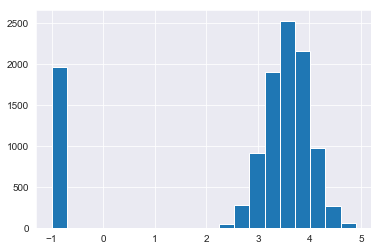

In [14]:
train['Rating'].hist(bins=20)

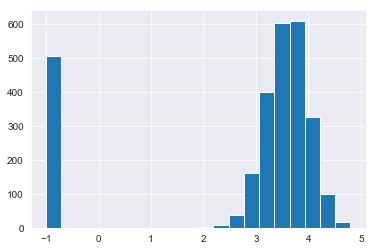

In [15]:
test['Rating'].hist(bins=20)

In [16]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Reviews_freq,Votes_freq,Rating_freq,Restaurant_count,min_order_freq,avg_cost_freq,Cuisines_freq
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30,356,150,818,1,10117,3241,1
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30,356,153,818,5,10117,2557,61
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65,89,19,846,2,10117,2462,3
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30,13,9,869,2,779,881,16
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65,10,2,511,1,779,3241,14


In [17]:
train['Cuisines'].value_counts()

North Indian                                                               850
North Indian, Chinese                                                      614
Fast Food                                                                  433
South Indian                                                               270
Chinese                                                                    245
Street Food                                                                181
Bakery, Desserts                                                           171
Bakery                                                                     168
North Indian, Mughlai                                                      155
Pizza, Fast Food                                                           133
Chinese, North Indian                                                      125
Fast Food, Beverages                                                       114
North Indian, Fast Food                             

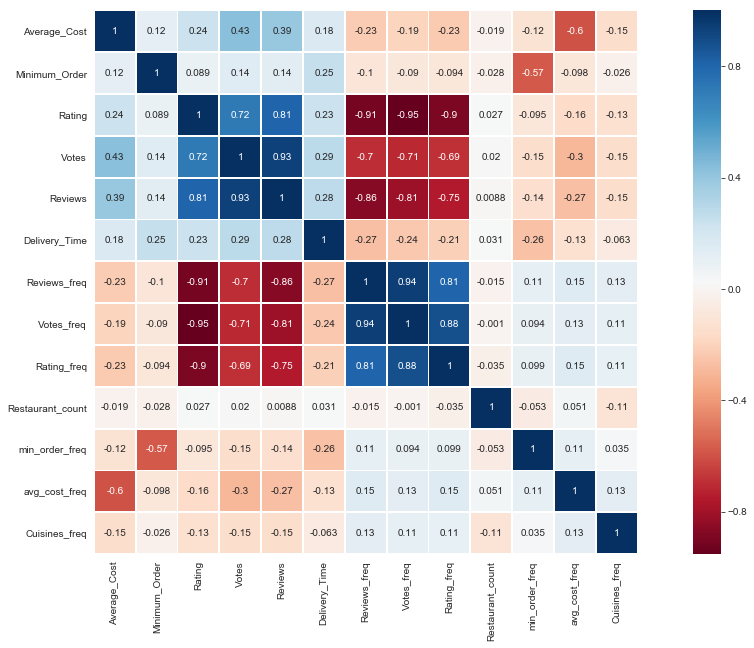

In [18]:
#correlelogram- plot heatmap to find correlation among features
corrmat =train.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrmat, square=True, annot=True,linewidth=0.8, cmap='RdBu')

C:\Users\ABOFFICIAL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


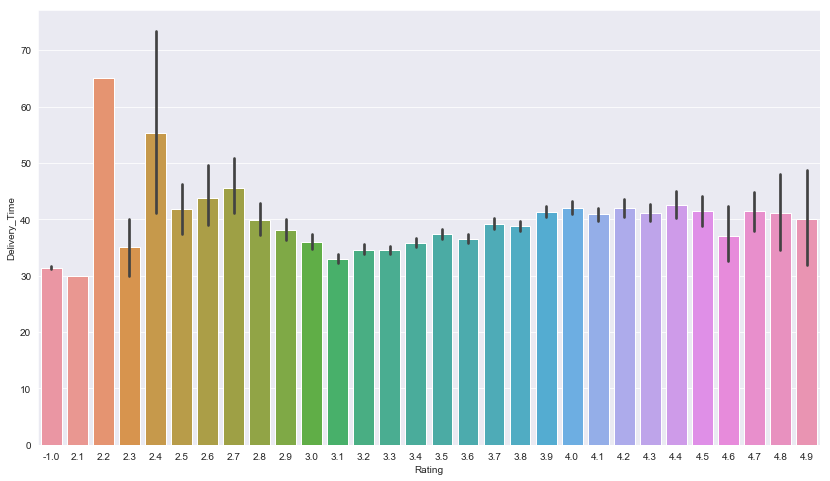

In [19]:
plt.figure(figsize=[14,8])
sns.barplot('Rating', 'Delivery_Time', data =train)

In [20]:
train.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'Reviews_freq',
       'Votes_freq', 'Rating_freq', 'Restaurant_count', 'min_order_freq',
       'avg_cost_freq', 'Cuisines_freq'],
      dtype='object')

In [21]:
train = train.drop(['Restaurant','Location','Cuisines','Reviews_freq', 'Votes_freq', 'Rating_freq'], axis=1)
test = test.drop(['Restaurant','Location','Cuisines','Reviews_freq', 'Votes_freq', 'Rating_freq'], axis=1)

In [22]:
train.dtypes

Average_Cost          int64
Minimum_Order         int64
Rating              float64
Votes                 int64
Reviews               int64
Delivery_Time         int64
Restaurant_count      int64
min_order_freq        int64
avg_cost_freq         int64
Cuisines_freq         int64
dtype: object

In [29]:
X = train.drop('Delivery_Time', axis=1)
y = train.Delivery_Time

In [30]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [31]:
# Split the data into 30% validation and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [32]:
#Model Building
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor( loss = 'huber',learning_rate=0.1,n_estimators=300, max_depth=4 , subsample=1,  verbose=False,random_state=126)  
gbr.fit(X, y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=300,
             n_iter_no_change=None, presort='auto', random_state=126,
             subsample=1, tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [33]:
#Prediction for test data 
y_pred_gbr = gbr.predict(test)
y1=y_pred_gbr.astype(int) 
y1=y1.astype(int).astype(str) 
for i in range(len(y1)):
    y1[i] = y1[i]+" minutes"

In [34]:
#Sending output to Excel file
df = pd.DataFrame (y1)
print(df.head)
df.to_excel("Gengineer2.xlsx", index = False)

<bound method NDFrame.head of                0
0     35 minutes
1     30 minutes
2     34 minutes
3     33 minutes
4     38 minutes
5     32 minutes
6     39 minutes
7     31 minutes
8     29 minutes
9     31 minutes
10    40 minutes
11    29 minutes
12    31 minutes
13    32 minutes
14    37 minutes
15    31 minutes
16    40 minutes
17    30 minutes
18    31 minutes
19    44 minutes
20    30 minutes
21    40 minutes
22    48 minutes
23    34 minutes
24    30 minutes
25    48 minutes
26    30 minutes
27    39 minutes
28    30 minutes
29    29 minutes
30    32 minutes
31    32 minutes
32    48 minutes
33    36 minutes
34    34 minutes
35    44 minutes
36    33 minutes
37    39 minutes
38    90 minutes
39    45 minutes
...          ...
2734  42 minutes
2735  33 minutes
2736  38 minutes
2737  31 minutes
2738  92 minutes
2739  32 minutes
2740  32 minutes
2741  31 minutes
2742  50 minutes
2743  35 minutes
2744  31 minutes
2745  40 minutes
2746  45 minutes
2747  31 minutes
2748  30 minutes
2